# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 21

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import requests
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['value_next10']  = df['xPoints_next10'] / (df['now_cost'] / 10.0)

In [6]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [7]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 3

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [8]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
333,Forster,Southampton,44,3.0,12,14.959164,4.0,4.986388,4.940461,38.671441,2.377167
376,Foster,Watford,41,8.0,28,30.401729,3.5,3.800216,NaN,36.792804,1.876793
353,Lloris,Tottenham,54,18.0,81,75.695518,4.5,4.205307,5.030912,46.816693,1.809676
270,de Gea,Manchester Utd,52,19.0,76,77.227773,4.0,4.064620,5.170779,41.179149,1.782454
475,Sá,Wolves,52,19.0,88,77.074690,4.6,4.056563,3.308705,36.622869,1.778920
80,Raya,Brentford,43,9.0,34,33.062035,3.8,3.673559,NaN,39.304683,1.771548
408,Fabianski,West Ham,50,21.0,78,83.060502,3.7,3.955262,5.981649,40.932080,1.768847
257,Ederson,Manchester City,61,20.0,88,84.298423,4.4,4.214921,5.050611,40.031953,1.706572
69,Sánchez,Brighton,46,18.0,67,65.101565,3.7,3.616754,4.498693,40.184919,1.686320


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
135,Chilwell,Chelsea,56,6.0,54,36.799370,9.0,6.133228,NaN,42.244116,2.591762
237,Alexander-Arnold,Liverpool,84,18.0,132,122.731975,7.3,6.818443,6.189047,53.565199,2.352586
256,Cancelo,Manchester City,70,20.0,121,117.295423,6.0,5.864771,5.618926,44.566551,2.216675
122,Alonso,Chelsea,57,15.0,71,75.133925,4.7,5.008928,6.314410,39.987425,2.098009
142,James,Chelsea,62,16.0,91,80.597320,5.7,5.037333,5.288911,39.987425,2.023041
259,Laporte,Manchester City,56,17.0,84,78.595660,4.9,4.623274,5.579011,37.106430,1.953690
364,Davies,Tottenham,45,9.0,37,37.239759,4.1,4.137751,3.816241,41.955708,1.950555
252,Stones,Manchester City,53,6.0,32,26.889527,5.3,4.481588,4.809675,28.485039,1.946677
245,Tsimikas,Liverpool,37,9.0,33,33.517487,3.7,3.724165,2.595125,28.392994,1.936101


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
268,Torres,Manchester City,67,4.0,26,25.285921,6.5,6.321480,NaN,35.046111,2.442201
266,Rodrigo,Manchester City,55,12.0,60,61.835764,3.5,5.152980,2.615963,34.930849,2.197238
233,Salah,Liverpool,128,20.0,177,153.418049,8.8,7.670902,5.432137,53.368315,2.144082
265,Foden,Manchester City,80,13.0,73,76.632494,5.6,5.894807,5.605552,47.314202,2.084129
420,Bowen,West Ham,67,21.0,115,112.317126,5.5,5.348435,8.896662,45.823699,2.066281
240,Jota,Liverpool,83,19.0,101,108.227646,5.3,5.696192,5.074887,43.465676,1.977177
250,Gündogan,Manchester City,73,14.0,70,73.336224,5.0,5.238302,3.144239,32.426578,1.938782
144,Gallagher,Crystal Palace,61,17.0,91,78.457685,5.4,4.615158,2.474535,39.361812,1.868623
196,Raphinha,Leeds United,65,17.0,84,80.070817,4.9,4.710048,4.912946,41.415826,1.847433


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
177,Calvert-Lewin,Everton,79,4.0,23,29.460,5.8,7.365000,4.400000,40.844686,2.620349
468,King,Watford,58,16.0,63,64.704,3.9,4.044000,3.335500,41.818482,1.679180
450,Dennis,Watford,61,17.0,92,68.526,5.4,4.030941,2.600000,42.820052,1.632080
189,Bamford,Leeds United,77,6.0,25,27.142,4.2,4.523667,NaN,37.176672,1.630216
413,Antonio,West Ham,79,20.0,94,91.146,4.7,4.557300,5.192750,43.549450,1.621415
263,Jesus,Manchester City,86,17.0,69,76.397,4.1,4.493941,4.357000,36.351900,1.532421
307,Saint-Maximin,Newcastle Utd,66,19.0,74,72.184,3.9,3.799158,4.366667,35.649536,1.478820
579,Ronaldo,Manchester Utd,125,16.0,82,82.353,5.1,5.147063,5.157000,47.238831,1.455809
63,Maupay,Brighton,65,17.0,68,62.691,4.0,3.687706,3.523667,37.279101,1.446437


Below we compile a list sorting players based on a given metric (irrespective of position).

In [9]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','xPoints_next10',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,xPoints_next10,valuePoints metric
id,,,,,,,,,,
233,Salah,Liverpool,128,20.0,177,153.418049,8.8,7.670902,53.368315,2.144082
177,Calvert-Lewin,Everton,79,4.0,23,29.460000,5.8,7.365000,40.844686,2.620349
237,Alexander-Arnold,Liverpool,84,18.0,132,122.731975,7.3,6.818443,53.565199,2.352586
268,Torres,Manchester City,67,4.0,26,25.285921,6.5,6.321480,35.046111,2.442201
544,Branthwaite,Everton,40,1.0,9,6.302493,9.0,6.302493,44.701445,3.151246
135,Chilwell,Chelsea,56,6.0,54,36.799370,9.0,6.133228,42.244116,2.591762
253,Mendy,Manchester City,52,1.0,3,5.914921,3.0,5.914921,34.074970,2.593865
265,Foden,Manchester City,80,13.0,73,76.632494,5.6,5.894807,47.314202,2.084129
359,Son,Tottenham,107,17.0,108,99.803942,6.4,5.870820,56.002084,1.794762


In [10]:
metric = 'valuePoints metric'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','xPoints_next10',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,
177,Calvert-Lewin,Everton,79,4.0,5.8,7.365000,4.400000,40.844686,2.620349
135,Chilwell,Chelsea,56,6.0,9.0,6.133228,NaN,42.244116,2.591762
268,Torres,Manchester City,67,4.0,6.5,6.321480,NaN,35.046111,2.442201
333,Forster,Southampton,44,3.0,4.0,4.986388,4.940461,38.671441,2.377167
237,Alexander-Arnold,Liverpool,84,18.0,7.3,6.818443,6.189047,53.565199,2.352586
256,Cancelo,Manchester City,70,20.0,6.0,5.864771,5.618926,44.566551,2.216675
266,Rodrigo,Manchester City,55,12.0,3.5,5.152980,2.615963,34.930849,2.197238
233,Salah,Liverpool,128,20.0,8.8,7.670902,5.432137,53.368315,2.144082
122,Alonso,Chelsea,57,15.0,4.7,5.008928,6.314410,39.987425,2.098009


In [11]:
metric = 'adjusted points per game'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 10',\
                                                        'xPoints_next10','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 10,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
233,Salah,Liverpool,128,20.0,177,153.418049,8.8,7.670902,7.150289,53.368315,2.144082
177,Calvert-Lewin,Everton,79,4.0,23,29.460000,5.8,7.365000,4.400000,40.844686,2.620349
237,Alexander-Arnold,Liverpool,84,18.0,132,122.731975,7.3,6.818443,7.699710,53.565199,2.352586
268,Torres,Manchester City,67,4.0,26,25.285921,6.5,6.321480,NaN,35.046111,2.442201
135,Chilwell,Chelsea,56,6.0,54,36.799370,9.0,6.133228,9.352280,42.244116,2.591762
265,Foden,Manchester City,80,13.0,73,76.632494,5.6,5.894807,5.814040,47.314202,2.084129
359,Son,Tottenham,107,17.0,108,99.803942,6.4,5.870820,6.931357,56.002084,1.794762
256,Cancelo,Manchester City,70,20.0,121,117.295423,6.0,5.864771,6.087121,44.566551,2.216675
240,Jota,Liverpool,83,19.0,101,108.227646,5.3,5.696192,6.537864,43.465676,1.977177


In [12]:
metric = f'gameweek {gameweek+1} prediction'
#metric = f'xPoints_next10'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,gameweek 22 prediction,valuePoints metric
id,,,,,,,,,,
359,Son,Tottenham,107,17.0,108,99.803942,6.4,5.870820,10.212366,1.794762
450,Dennis,Watford,61,17.0,92,68.526000,5.4,4.030941,8.842440,1.632080
579,Ronaldo,Manchester Utd,125,16.0,82,82.353000,5.1,5.147063,8.811502,1.455809
212,Maddison,Leicester City,69,18.0,82,73.717880,4.6,4.095438,8.732699,1.559107
353,Lloris,Tottenham,54,18.0,81,75.695518,4.5,4.205307,8.727617,1.809676
357,Kane,Tottenham,122,17.0,53,72.791000,3.1,4.281824,8.709146,1.225883
468,King,Watford,58,16.0,63,64.704000,3.9,4.044000,8.639763,1.679180
370,Reguilón,Tottenham,54,17.0,76,75.308767,4.5,4.429927,8.508138,1.906337
135,Chilwell,Chelsea,56,6.0,54,36.799370,9.0,6.133228,8.417256,2.591762


In [13]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,
233,Salah,Liverpool,128,20.0,8.8,7.670902,2.144082,12.5,6.8,19.3,0.965000
240,Jota,Liverpool,83,19.0,5.3,5.696192,1.977177,10.6,3.6,14.2,0.747368
230,Mané,Liverpool,118,20.0,4.8,5.438052,1.583078,10.3,2.9,13.2,0.660000
579,Ronaldo,Manchester Utd,125,16.0,5.1,5.147063,1.455809,8.8,1.6,10.4,0.650000
357,Kane,Tottenham,122,17.0,3.1,4.281824,1.225883,7.6,2.7,10.3,0.605882
413,Antonio,West Ham,79,20.0,4.7,4.557300,1.621415,7.6,4.2,11.8,0.590000
420,Bowen,West Ham,67,21.0,5.5,5.348435,2.066281,7.1,4.1,11.2,0.533333
255,Sterling,Manchester City,107,17.0,4.5,4.986730,1.524488,7.0,2.8,9.8,0.576471
359,Son,Tottenham,107,17.0,6.4,5.870820,1.794762,6.9,3.5,10.4,0.611765


## Player Visualizations

In [14]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,gameweek 22 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
413,Antonio,West Ham,79,20.0,94,91.146,4.7,4.5573,4.689265,43.54945,1.621415


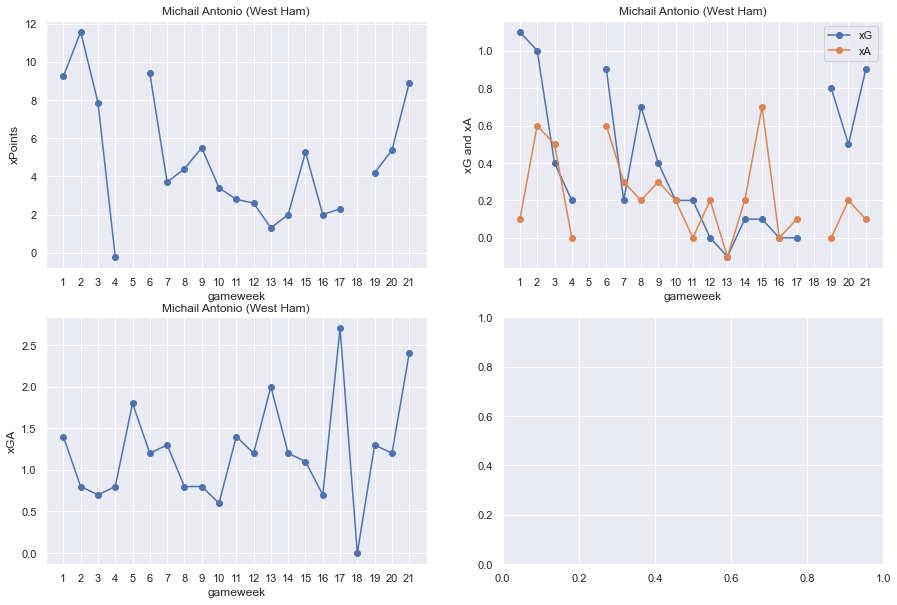

In [15]:
# find player index
name_string = 'Antonio'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound[['web_name','team_name','now_cost','games played','total_points','adjusted points',\
                      'points_per_game','adjusted points per game',f'gameweek {gameweek+1} prediction',\
                      'xPoints_next10', 'valuePoints metric']])
# plot xPoints over time
ix = playersFound.index[0]
#ix = 468

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [16]:
session = requests.session()

In [17]:
filepath = Path('../../../access_control/FPL_access.txt')
with open(filepath) as file:
    text = file.read().splitlines()
    email = text[0]
    password = text[1]

In [18]:
url = 'https://users.premierleague.com/accounts/login/'

payload = {
'password': password,
'login': email,
'redirect_uri': 'https://fantasy.premierleague.com/a/login', 'app': 'plfpl-web'
}
session.post(url, data=payload)

<Response [200]>

In [23]:
response = session.get('https://fantasy.premierleague.com/api/my-team/3202682')
team = response.json()['picks']

In [24]:
my_player_ix = [player['element'] for player in team]
my_starting11 = my_player_ix[:-4]
my_subs = my_player_ix[-4:]

In [25]:
exp_avg = df.loc[my_starting11,'adjusted points per game'].sum() + \
                df.loc[my_starting11,'adjusted points per game'].max()
exp_next = df.loc[my_starting11, f'gameweek {gameweek+1} prediction'].sum() + \
                df.loc[my_starting11,f'gameweek {gameweek+1} prediction'].max()

print('STARTING 11')
print('Expected points on average: ' + str(exp_avg))
print('Predicted points next gameweek: ' + str(exp_next))
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10', \
           f'gameweek {gameweek+1} prediction','xPoints_next10', 'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10', \
         f'gameweek {gameweek+1} prediction', 'xPoints_next10', 'valuePoints metric']].head(numberToShow))

STARTING 11
Expected points on average: 59.58498427113496
Predicted points next gameweek: 76.11876320838928


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,gameweek 22 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
376,Foster,Watford,41,8.0,3.5,3.800216,NaN,3.732196,7.126262,36.792804,1.876793
256,Cancelo,Manchester City,70,20.0,6.0,5.864771,5.618926,6.087121,3.382113,44.566551,2.216675
237,Alexander-Arnold,Liverpool,84,18.0,7.3,6.818443,6.189047,7.699710,5.406420,53.565199,2.352586
76,Jansson,Brentford,46,20.0,3.2,3.504765,2.945957,3.251365,5.706156,36.225051,1.634105
138,Mount,Chelsea,77,18.0,5.3,4.971793,4.969252,5.005574,8.248278,42.257005,1.791710
250,Gündogan,Manchester City,73,14.0,5.0,5.238302,3.144239,4.915538,2.538352,32.426578,1.938782
212,Maddison,Leicester City,69,18.0,4.6,4.095438,5.439323,6.046248,8.732699,45.391452,1.559107
420,Bowen,West Ham,67,21.0,5.5,5.348435,8.896662,6.243277,4.791832,45.823699,2.066281
450,Dennis,Watford,61,17.0,5.4,4.030941,2.600000,5.030429,8.842440,42.820052,1.632080



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,gameweek 22 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
559,Ramsdale,Arsenal,51,17.0,4.9,3.795232,3.394864,4.136828,3.566956,32.314364,1.680557
491,Livramento,Southampton,43,18.0,3.0,2.851443,1.432986,2.116568,3.371589,29.548766,1.375088
425,Johnson,West Ham,40,11.0,2.7,2.784266,1.602388,1.909279,2.665494,26.451619,1.392133
145,Gilmour,Norwich City,43,12.0,2.2,2.550400,2.433368,2.581238,2.442913,23.883338,1.229912


## Save data

In [22]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)